In [85]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [86]:
METRIC = "homogenization_expected_failure"

In [87]:
df = pd.read_csv("../acs_results.csv")
CONFORMAL = False
N_TRAIN = 2588885
MIN_DATA_SCALE = 10

In [88]:
df = df.drop(columns=["random_seed", "task_type"])
df = df.groupby(["exp_type", "random_distance", "num_models", "data_scale", "method"]).mean().reset_index(drop=False)
df["data_scale"] = (N_TRAIN/df["data_scale"]).astype(int)

In [89]:
def table_by_models(data, metric, exp_type="baseline", method="lockout", data_scale=10):
    df = data
    df = df[df["data_scale"]==int(N_TRAIN/data_scale)]
    df = df[df["method"]==method]
    df = df[df["exp_type"]==exp_type]
    df = df[["num_models", "random_distance", metric]]
    df = df[df["num_models"]>1]
    rows = []
    for r in df["random_distance"].unique():
        row = {}
        row["random_distance"] = r
        for n in np.sort(df["num_models"].unique()):
            row[str(n)] = float(df.loc[(df["random_distance"]==r) & (df["num_models"]==n), metric])
        rows.append(row)
    return pd.DataFrame(rows).round(3)

In [90]:
def table_by_data(data, metric, exp_type="baseline", method="lockout", num_models=2):
    df = data
    df = df[df["num_models"]==num_models]
    df = df[df["method"]==method]
    df = df[df["exp_type"]==exp_type]
    df = df[["data_scale", "random_distance", metric]]
    rows = []
    for r in df["random_distance"].unique():
        row = {}
        row["random_distance"] = r
        for n in np.sort(df["data_scale"].unique()):
            row[str(n)] = float(df.loc[(df["random_distance"]==r) & (df["data_scale"]==n), metric])
        rows.append(row)
    return pd.DataFrame(rows).round(3)

In [91]:
def plot(data, metric, xaxis, exp_type="baseline", method="lockout", ylog=False, ylim=None, save=False):
    plt.rcParams["figure.figsize"] = [7,3]
    fig, ax = plt.subplots()

    df = data
    df = df[df["method"]==method]
    df = df[df["exp_type"]==exp_type]
    df = df[df[xaxis]>1]

    if CONFORMAL:
        plt.plot(df.loc[df["random_distance"]==0, xaxis], df.loc[df["random_distance"]==0, metric], '*-', color='#00060e', label="Threshold")
        plt.plot(df.loc[df["random_distance"]==0.05, xaxis], df.loc[df["random_distance"]==0.05, metric], '*-', color='#001e49', label="Alpha = 0.05")
        plt.plot(df.loc[df["random_distance"]==0.1, xaxis], df.loc[df["random_distance"]==0.1, metric], '*-', color='#002f70', label="Alpha = 0.1")
        plt.plot(df.loc[df["random_distance"]==0.2, xaxis], df.loc[df["random_distance"]==0.2, metric], '*-', color='#003f97', label="Alpha = 0.2")
        plt.plot(df.loc[df["random_distance"]==0.3, xaxis], df.loc[df["random_distance"]==0.3, metric], '*-', color='#004fbf', label="Alpha = 0.3")
        plt.plot(df.loc[df["random_distance"]==0.4, xaxis], df.loc[df["random_distance"]==0.4, metric], '*-', color='#0068f9', label="Alpha = 0.4")
    else:
        plt.plot(df.loc[df["random_distance"]==0, xaxis], df.loc[df["random_distance"]==0, metric], '*-', color='#00060e', label="Threshold")
        plt.plot(df.loc[df["random_distance"]==0.1, xaxis], df.loc[df["random_distance"]==0.1, metric], '*-', color='#001e49', label="Random(0.4,0.6)")
        plt.plot(df.loc[df["random_distance"]==0.2, xaxis], df.loc[df["random_distance"]==0.2, metric], '*-', color='#002f70', label="Random(0.3,0.7)")
        plt.plot(df.loc[df["random_distance"]==0.3, xaxis], df.loc[df["random_distance"]==0.3, metric], '*-', color='#003f97', label="Random(0.2,0.8)")
        plt.plot(df.loc[df["random_distance"]==0.4, xaxis], df.loc[df["random_distance"]==0.4, metric], '*-', color='#004fbf', label="Random(0.1,0.9)")
        plt.plot(df.loc[df["random_distance"]==0.5, xaxis], df.loc[df["random_distance"]==0.5, metric], '*-', color='#0068f9', label="All Random")


    if ylim:
        plt.ylim(ylim)
    if ylog:
        plt.yscale('log')   

    plt.xlabel(xaxis)
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    fig.tight_layout()
    fig.savefig(metric+'.png')
    plt.show()

# Results -- Accuracy

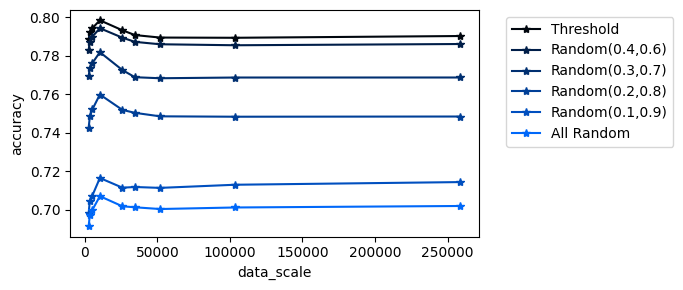

In [92]:
plot(df[df["num_models"]==2], "accuracy", "data_scale")

In [93]:
table_by_models(df, "accuracy")[["random_distance", "2"]].rename(columns={'2':"accuracy"})

,random_distance,accuracy
0,0.0,0.790
1,0.1,0.786
2,0.2,0.769
3,0.3,0.748
4,0.4,0.714
5,0.5,0.702


### Acceptance Rate 

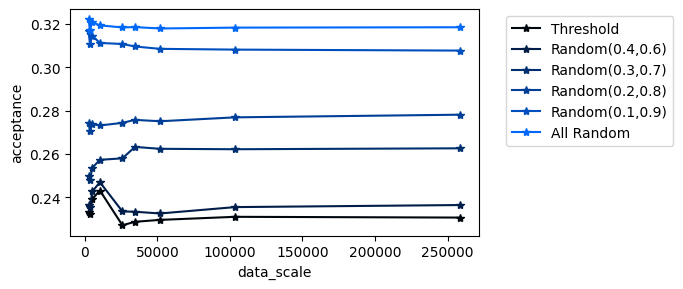

In [94]:
plot(df[df["num_models"]==2], "acceptance", "data_scale")

# Results -- Homogenization As Repeated Inaccurate Decisions

### Baseline: Homogenization Across Same Model Class + Training Data + Prediction Task

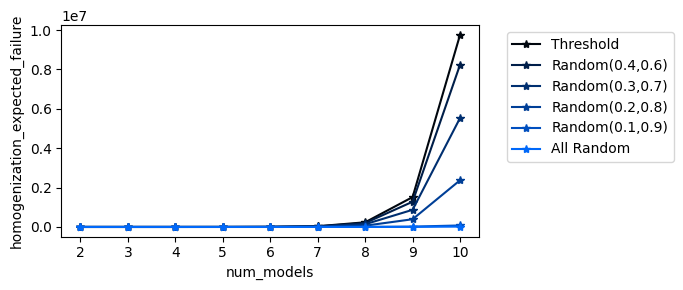

In [95]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "baseline", "inaccurate")

In [96]:
table_by_models(df, METRIC, "baseline", "inaccurate")

,random_distance,2,3,4,5,6,7,8,9,10
0,0.0,5.155,28.342,163.653,979.272,6009.957,37549.821,237622.060,1517708.548,9760532.781
1,0.1,4.582,24.066,137.152,819.938,5045.555,31610.995,200467.346,1281701.388,8243883.835
2,0.2,3.803,18.402,101.080,591.645,3582.289,22121.184,138340.710,872448.178,5535396.083
3,0.3,3.036,12.639,62.549,337.731,1909.161,11091.480,65601.778,392846.116,2374145.902
4,0.4,1.976,5.414,17.789,64.681,250.001,1007.441,4191.224,17884.023,77878.409
5,0.5,1.742,4.234,12.183,38.222,125.945,428.128,1485.891,5232.836,18655.818


### Different Training Data (Same Model Class + Prediction Task)

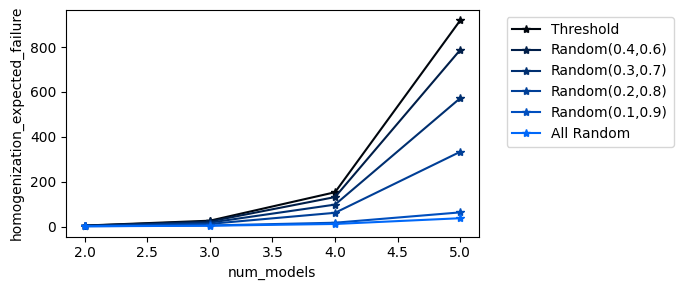

In [97]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "data_partitions", "inaccurate")

### Different Model Classes (Same Training Data + Prediction Task)

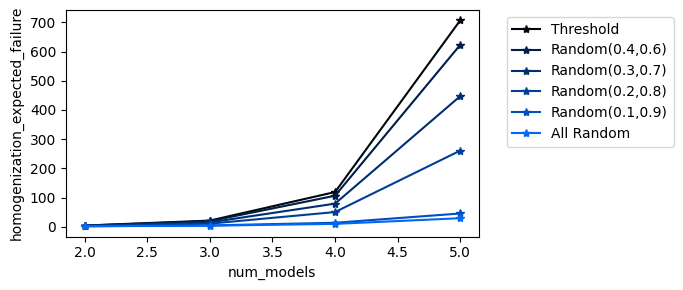

In [98]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "models", "inaccurate")

### Different Prediction Tasks (Same Model Class + Training Data)

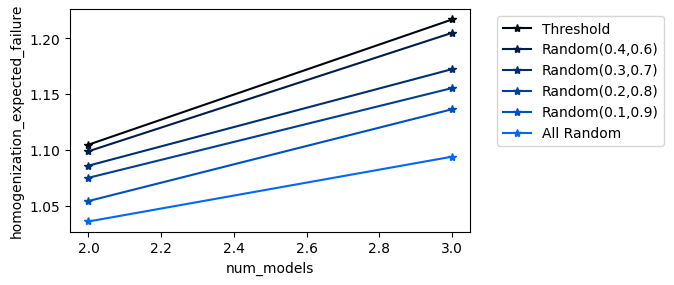

In [99]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "tasks", "inaccurate")

# Results -- Homogenization As Repeated Negative Decisions

### Baseline: Homogenization Across Same Model Class + Training Data + Prediction Task

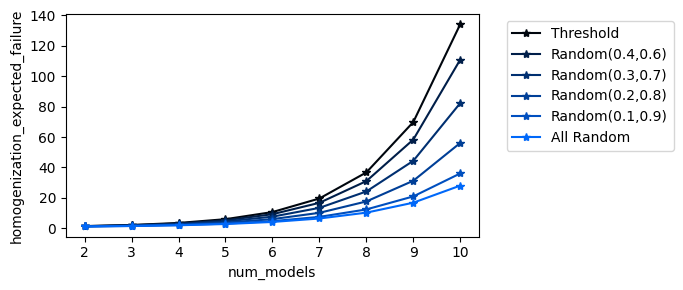

In [100]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "baseline", "lockout")

In [101]:
table_by_models(df, METRIC, "baseline", "lockout")

,random_distance,2,3,4,5,6,7,8,9,10
0,0.0,1.404,2.130,3.462,5.943,10.626,19.555,36.710,69.867,134.248
1,0.1,1.343,1.969,3.116,5.237,9.208,16.710,30.989,58.330,110.943
2,0.2,1.280,1.800,2.742,4.456,7.594,13.390,24.170,44.358,82.355
3,0.3,1.219,1.632,2.367,3.668,5.980,10.125,17.614,31.233,56.133
4,0.4,1.167,1.492,2.056,3.013,4.648,7.463,12.356,20.931,36.055
5,0.5,1.151,1.444,1.940,2.759,4.119,6.396,10.246,16.798,28.041


### Different Training Data (Same Model Class + Prediction Task)

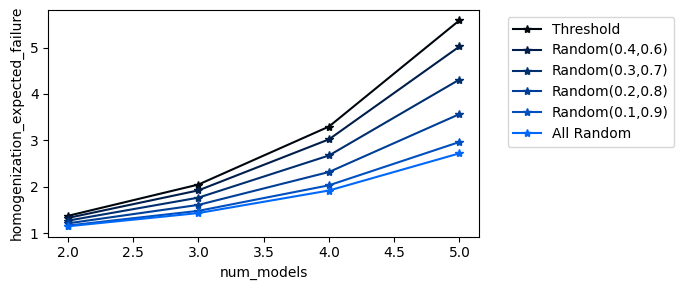

In [102]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "data_partitions", "lockout")

### Different Model Classes (Same Training Data + Prediction Task)

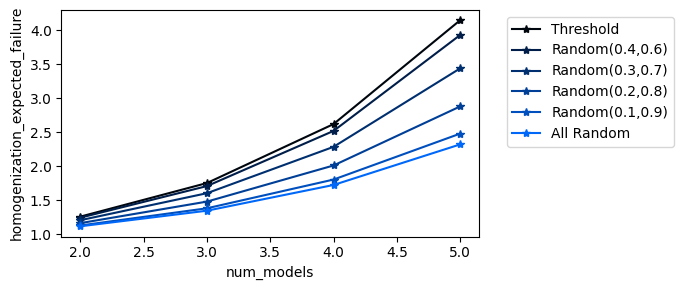

In [103]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "models", "lockout")

### Different Prediction Tasks (Same Model Class + Training Data)

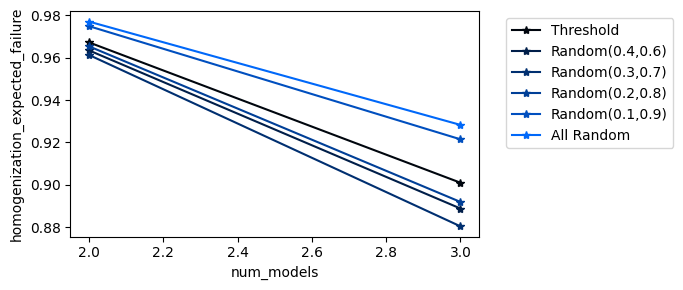

In [104]:
plot(df[df["data_scale"]==(int(N_TRAIN/MIN_DATA_SCALE))], METRIC, "num_models", "tasks", "lockout")

# Results -- By Data Scale

### Homogenization As Repeated Inaccurate Decisions

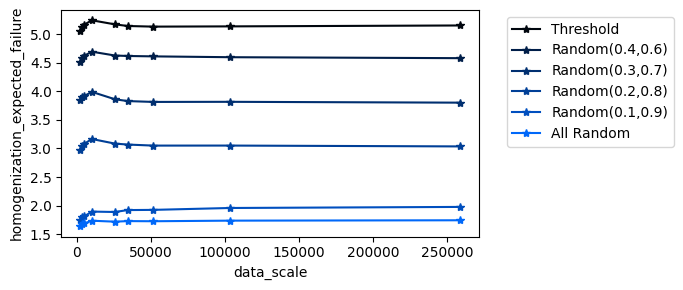

In [105]:
plot(df[df["num_models"]==2], METRIC, "data_scale", "baseline", "inaccurate")

### Homogenization As Repeated Negative Decisions

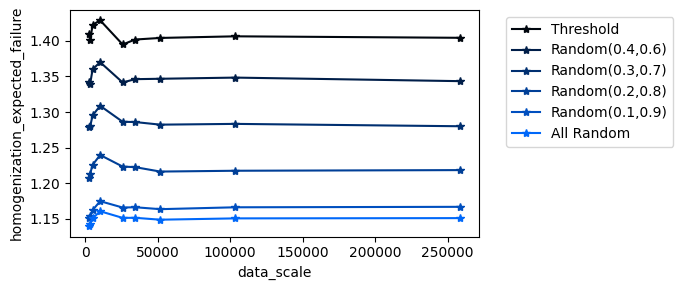

In [106]:
plot(df[df["num_models"]==2], METRIC, "data_scale", "baseline", "lockout")